# Compreensão de Negócio: Rotatividade de Clientes

## Intodução

Em uma empresa de telecomunicações, existem custos promocionais conhecidos como Custo de Aquisição e Custo de Retenção. Custo de aquisição é o custo para uma empresa adquirir novos clientes. Enquanto isso, o Custo de Retenção é o custo para a empresa reter os clientes existentes. 

Na maioria das empresas, o custo de aquisição é 5x maior que o custo de retenção. Isto quer dizer que é menos caro reter os clientes existentes do que conquistar novos clientes no lugar de clientes cancelados. Isso ocorre porque ganhar negócios com novos clientes significa utilizar todos os recursos de marketing e vendas. A retenção de clientes, por outro lado, geralmente é mais econômica, pois você já conquistou a confiança e a lealdade dos clientes existentes.  

Uma empresa fictícia de telecomunicações criada idealizada pela IBM, Telco Co., fornece telefone residencial e serviços de Internet para clientes na Califórnia, os dados de rotatividade de clientes no terceiro trimestre da empresa é o nosso caso de estudos.

## Objetivo

1. Analisar os dados fornecidos pela empresa e detalhar o perfil dos clientes rotativos e fixos.

2. Criar um modelo de aprendizado de máquina para prever a rotatividade e retenção de clientes.

3. A alocação de custos seja feita da forma mais precisa possível. 

# Dataset

O dataset usado possui dados de 7043 clientes da Telco com 33 variáveis. As variáveis indicam quais clientes saíram, permaneceram ou se inscreveram para o serviço. 

Detalhes do dataset: <a href="https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113" target='_blanck'> IBM - Telco_customer_churn </a>

Download : <a href ="https://community.ibm.com/accelerators/?context=analytics&query=telco%20churn&type=Data&product=Cognos%20Analytics" target='_blanck'> IBM - Cognos_Analytics </a>

Descrição das colunas:

CustomerID: um ID único que identifica cada cliente.

Count: um valor usado em relatórios / painéis para somar o número de clientes em um conjunto filtrado.

Country: o país de residência principal do cliente.

State: o estado da residência principal do cliente.

City: a cidade de residência principal do cliente.

Zip Code: o código postal da residência principal do cliente.

Lat Long: a latitude e longitude combinadas da residência principal do cliente.

Latitude: a latitude da residência principal do cliente.

Longitude: a longitude da residência principal do cliente.

Gender:  O sexo do cliente: Masculino, Feminino

Senior Citizen: indica se o cliente tem 65 anos ou mais: Sim, Não

Partner: Indique se o cliente tem parceiro: Sim, Não

Dependents: indica se o cliente mora com algum dependente: Sim, Não. Os dependentes podem ser filhos, pais, avós, etc.

Tenure Months:  indica a quantidade total de meses que o cliente esteve na empresa até o final do trimestre especificado.

Phone Service:  indica se o cliente é assinante de serviço telefônico residencial com a empresa: Sim, Não

Multiple Lines: indica se o cliente é assinante de várias linhas telefônicas da empresa: Sim, Não

Internet Service:  indica se o cliente é assinante de serviço de Internet com a empresa: No, DSL, Fiber Optic, Cable.

Online Security: indica se o cliente assina um serviço de segurança online adicional fornecido pela empresa: Sim, Não

Online Backup: indica se o cliente assina um serviço de backup online adicional fornecido pela empresa: Sim, Não

Device Protection: indica se o cliente assina um plano de proteção de dispositivo adicional para seu equipamento de Internet fornecido pela empresa: Sim, Não

Tech Support: Indica se o cliente assina um plano de suporte técnico adicional da empresa com tempos de espera reduzidos: Sim, Não

Streaming TV:  indica se o cliente usa seu serviço de Internet para fazer streaming de programas de televisão de um provedor terceirizado: Sim, Não. A empresa não cobra taxa adicional por esse serviço.

Streaming Movies: Indica se o cliente usa seu serviço de Internet para streaming de filmes de um provedor terceirizado: Sim, Não. A empresa não cobra taxa adicional por este serviço.

Contract: indica o tipo de contrato atual do cliente: mês a mês, um ano, dois anos.

Paperless Billing: indica se o cliente escolheu o fatura sem papel: Sim, Não

Payment Method: indica como o cliente paga sua fatura: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: indica a cobrança mensal total atual do cliente por todos os seus serviços da empresa.

Total Charges: indica as cobranças totais do cliente, calculadas até o final do trimestre especificado.

Churn Label: Sim = o cliente deixou a empresa neste trimestre. Não = o cliente permaneceu na empresa. Diretamente relacionado ao valor de rotatividade.

Churn Value: 1 = o cliente deixou a empresa neste trimestre. 0 = o cliente permaneceu na empresa. Relacionado diretamente ao rótulo de rotatividade.

Churn Score: Um valor de 0 a 100 que é calculado usando a ferramenta preditiva IBM SPSS Modeler. O modelo incorpora vários fatores conhecidos por causar rotatividade. Quanto maior a pontuação, maior a probabilidade de o cliente se desligar.

CLTV: Valor do tempo de vida do cliente. Um CLTV previsto é calculado usando fórmulas corporativas e dados existentes. Quanto maior o valor, mais valioso será o cliente. Clientes de alto valor devem ser monitorados quanto à rotatividade.

Churn Reason: o motivo específico de um cliente para deixar a empresa. Diretamente relacionado à categoria de rotatividade. 


## Importando as Bibliotecas e os Dados

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve,confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from xgboost import XGBClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
telco = pd.read_excel('Telco_customer_churn.xlsx') 
telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Limpeza e Transformação dos Dados


In [3]:
# Tirando os espços em branco do nome das colunas
new_col = telco.columns.str.replace(' ', '')
telco.columns = new_col

Vamos dividir o dataset original em dois, um com variáveis que influênciam a rotatividade e outro com variáveis que transmitem informações adicionais mas não influenciam diretamente na rotatividade. 

In [4]:
# lista de colunas para separar
code = ['Count', 'City', 'Country', 'State', 'ZipCode', 'LatLong', 'Latitude', 'Longitude','ChurnValue', 'ChurnReason', 'CLTV','ChurnScore']

# dataframe com as variáveis demográficos e de avaliação dos clientes
demographic = pd.DataFrame()
for c in code:
    demographic[c] = telco[c]
demographic.head()


,Count,City,Country,State,ZipCode,LatLong,Latitude,Longitude,ChurnValue,ChurnReason,CLTV,ChurnScore
0,1,Los Angeles,United States,California,90003,"33.964131, -118.272783",33.964131,-118.272783,1,Competitor made better offer,3239,86
1,1,Los Angeles,United States,California,90005,"34.059281, -118.30742",34.059281,-118.307420,1,Moved,2701,67
2,1,Los Angeles,United States,California,90006,"34.048013, -118.293953",34.048013,-118.293953,1,Moved,5372,86
3,1,Los Angeles,United States,California,90010,"34.062125, -118.315709",34.062125,-118.315709,1,Moved,5003,84
4,1,Los Angeles,United States,California,90015,"34.039224, -118.266293",34.039224,-118.266293,1,Competitor had better devices,5340,89


In [5]:
# cópia do datatset original
data = telco.copy()

# separa o dataframe com vriáveis de rotatividade
data = data.drop(['CustomerID'], axis=1)
data = data.drop(code, axis=1)

In [6]:
# quantidade de valores da coluna TotalCharges
data.TotalCharges.value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
6747.35     1
266.95      1
6751.35     1
740         1
4750.95     1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
# converte strings vazias para 0
data['TotalCharges'] = data["TotalCharges"].replace(" ",0)

# remove nulos e reseta os indices
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

# converte para float64
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [8]:
data["TotalCharges"].value_counts()

0.00       11
20.20      11
19.75       9
19.65       8
20.05       8
           ..
2062.15     1
1673.80     1
434.10      1
5958.85     1
2044.75     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
# altera o valor o valor de variáveis 
colsForReplacement = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for colName in colsForReplacement:
    data[colName] = data[colName].replace({'No internet service' : 'No'})

data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})


## Análise Exploratória

Vamos obter insigths sobre a rotatividade dos clientes explorando os dados e analisando seus resultados.

### Rotatividade de Clientes em Variáveis Categóricas

In [10]:
# divide entre rotativo ou não
rotativo = data[data['ChurnLabel']=='Yes']
nao_rotativo = data[data['ChurnLabel']=='No']

# separando colunas 
target_col = ['ChurnLabel']
num_cols = ['TenureMonths', 'MonthlyCharges', 'TotalCharges']
cat_cols   = [x for x in data.columns if x not in num_cols + ['ChurnLabel',]]

Para analisar as variáveis categórias, vamos criar uma tabela de gráficos de barras onde cada linha representa uma variável e cada coluna separa entre os dados rotativos e não rotativos.

In [11]:
# função que desenha gráfico de barras para variáveis ctegóricas
def drawBar(churn, no_churn, column):  
    fig = plt.figure(figsize=(13,4.5))
    plt.subplots_adjust(hspace=0.3)
    
    def bar_subplot(is_churn=True):
        # 
        data, plot = [rotativo, '121'] if is_churn else [nao_rotativo, '122']
        title = f'Rotativo - {column}' if is_churn else f'Não Rotativo - {column}'
        data_vals = data[column].value_counts().sort_values()
        
        fig.add_subplot(plot)
        plt.title(title, fontsize=17)
        if(column == 'PaymentMethod'): plt.xticks(rotation=20)
        for i, item in enumerate(data_vals):
            plt.text(i, item+data_vals.max()*.018, "{:0.2f}%".format(item/data_vals.sum()*100), 
                     horizontalalignment='center', verticalalignment='center',color='black')
        sns.countplot(data=data, x=column, order=data[column].value_counts(ascending=True).index)
    
    bar_subplot(True)
    bar_subplot(False)  


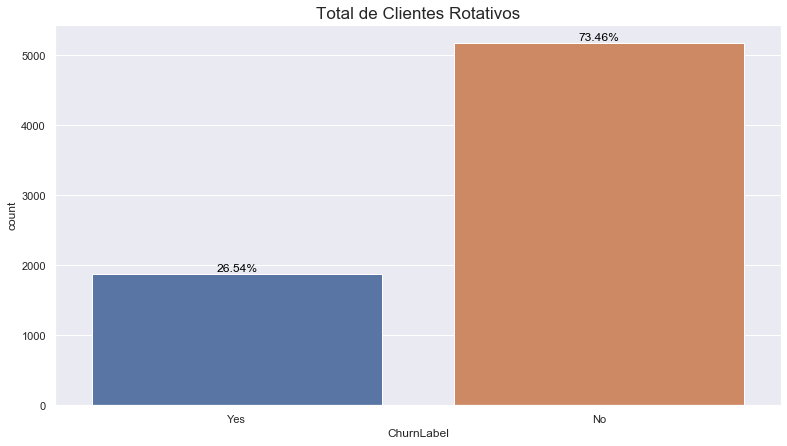

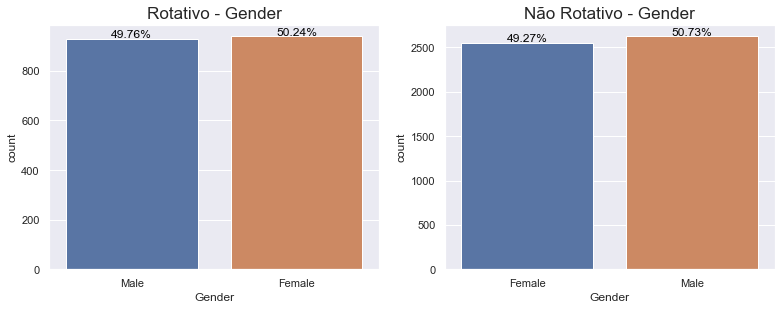

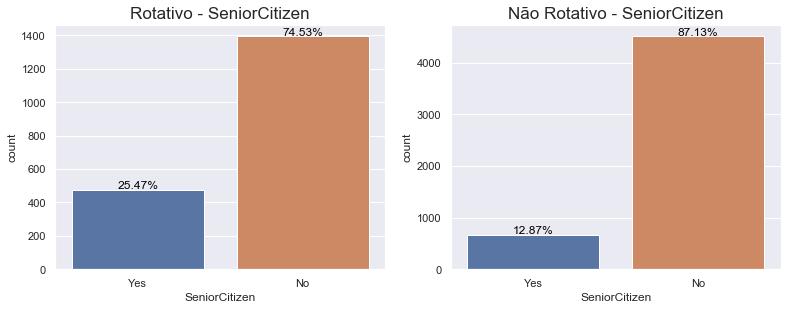

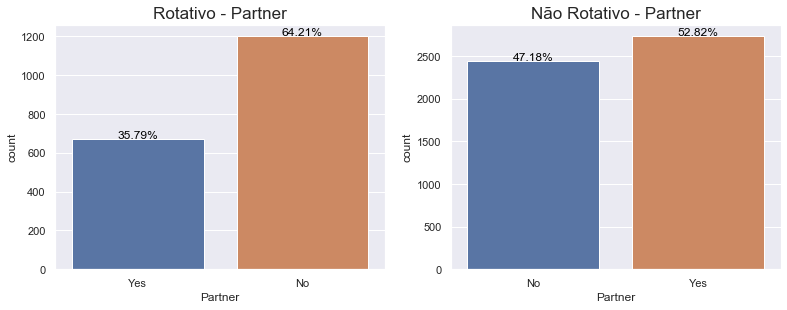

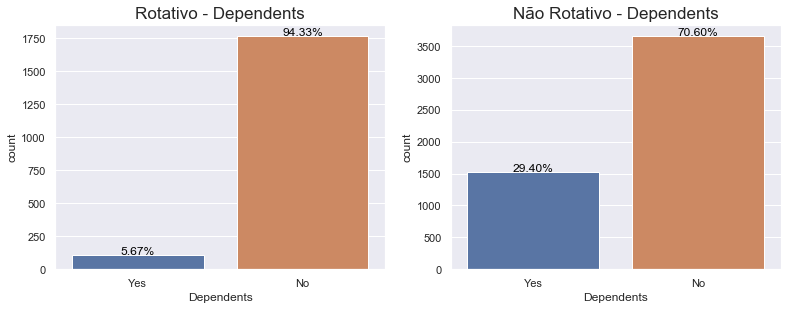

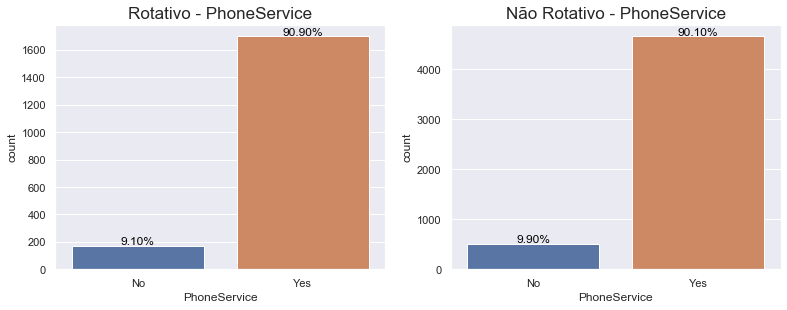

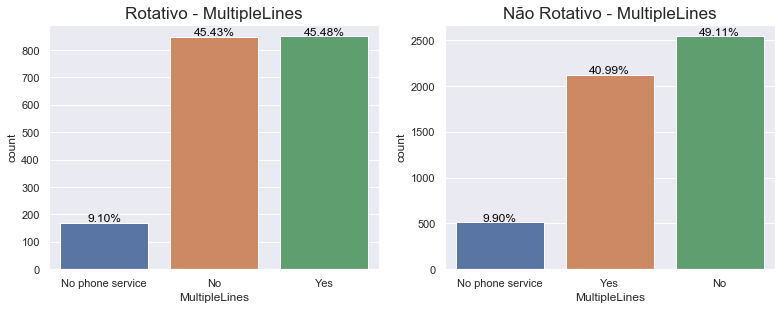

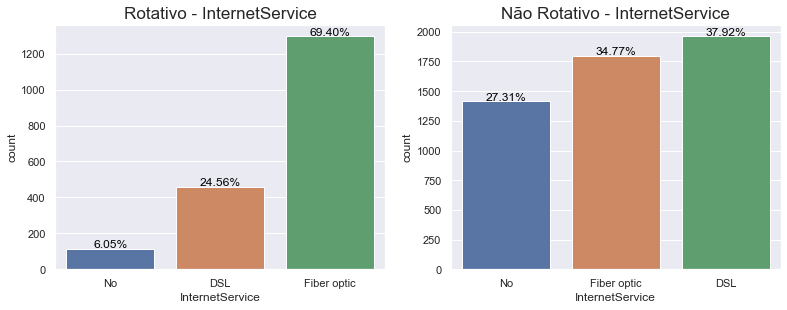

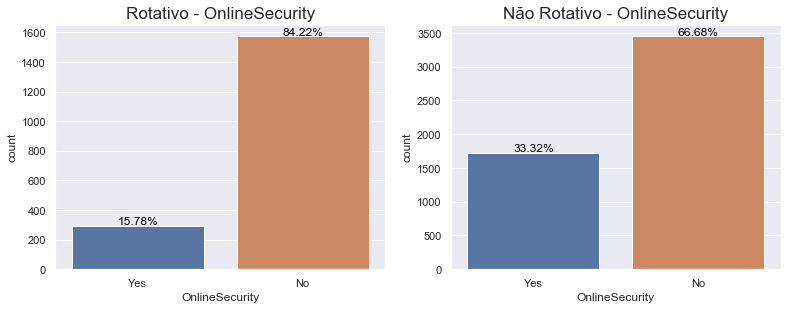

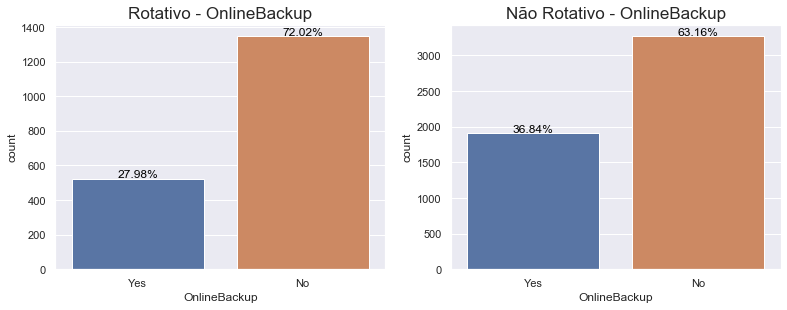

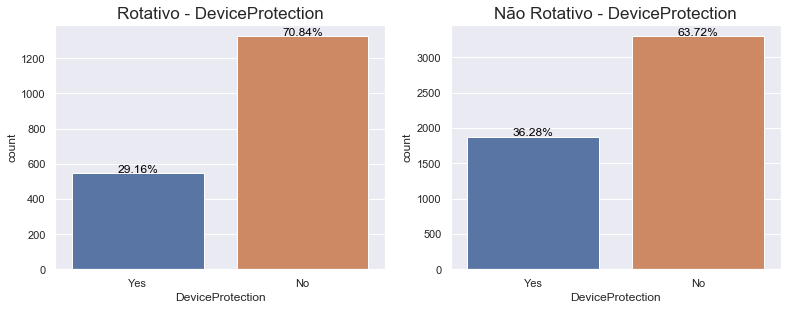

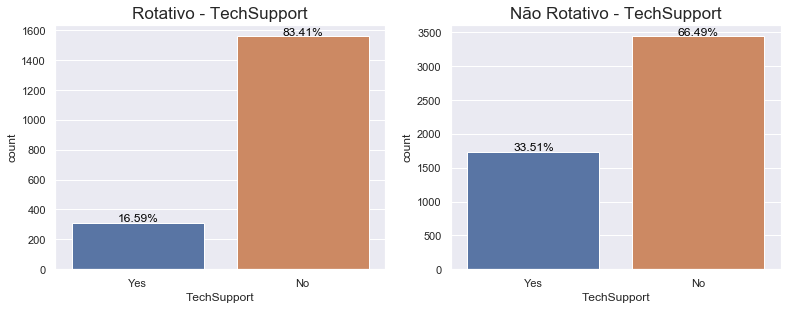

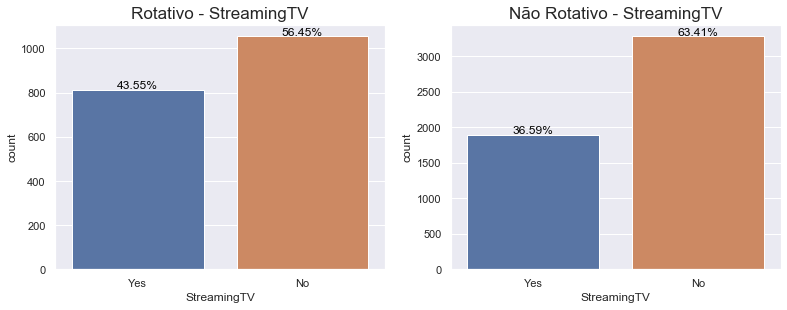

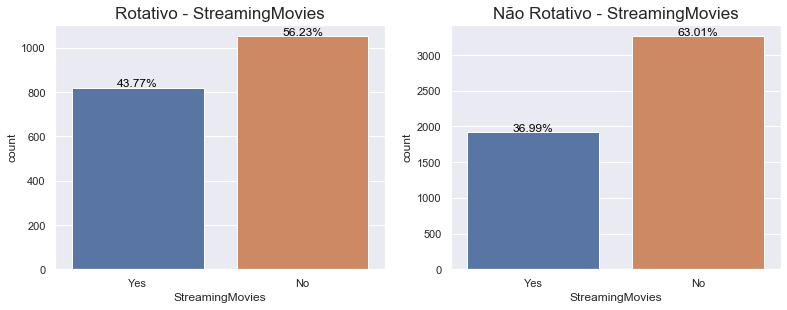

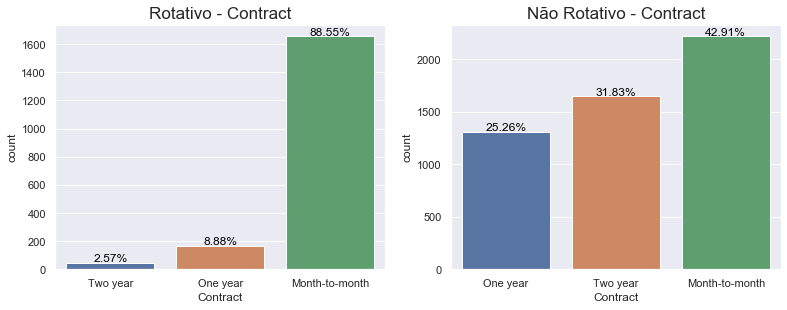

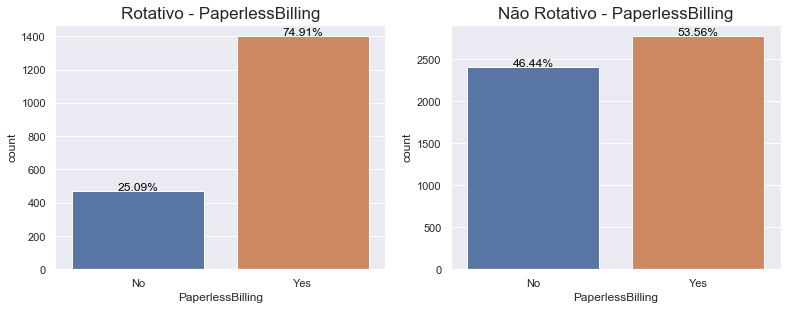

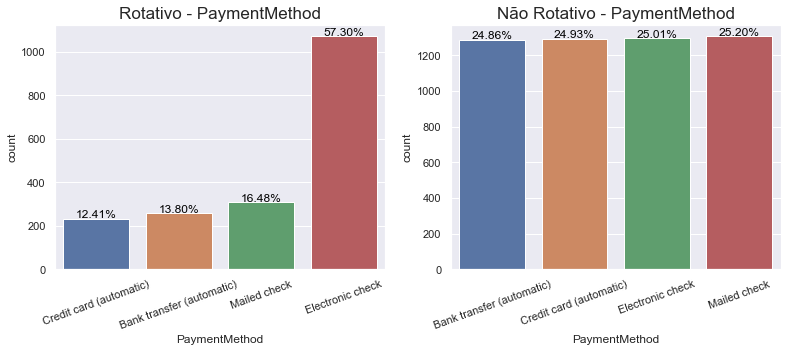

In [12]:
# contabiliza a quantidade de rotativo ou não
total_churn_vals = data['ChurnLabel'].value_counts().sort_values()

# gráfico de barras da quantidade de rotatividade
plt.figure(figsize=(13,7))
plt.title('Total de Clientes Rotativos', fontsize=17)
plt.text(0,total_churn_vals[0]+80, "{:0.2f}%".format(total_churn_vals[0]/total_churn_vals.sum()*100), 
         horizontalalignment='center', verticalalignment='center', color='black')
plt.text(1,total_churn_vals[1]+80, "{:0.2f}%".format(total_churn_vals[1]/total_churn_vals.sum()*100), 
         horizontalalignment='center', verticalalignment='center', color='black')

sns.countplot(data=data, x='ChurnLabel')

# Desenha gráfico de distribuição das variáveis categóricas
for colName in cat_cols:
    drawBar(rotativo, nao_rotativo, colName)

Insigths:

* O gênero não é um indicativo de rotatividade.

* Os clientes idosos representam uma pequena parcela dos clientes, mas têm uma taxa de desligamento muito mais alta do que a dos clientes não seniores.

* Os clientes que não têm parceiros são mais propensos a abandonar.

* Os clientes sem dependentes também são mais propensos a abandonar.

* Poucos clientes não têm serviço telefônico.

* Clientes com múltiplas linhas têm uma taxa de rotatividade ligeiramente maior.

* Clientes sem internet têm uma taxa de desligamento muito baixa.

* Os clientes com fibra são mais propensos a se desligarem do que aqueles com conexão DSL.

* Os clientes que não tem os serviços e segurança e suporte técnico ('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport') são mais propensos a abandonar.

*  O serviço de streaming ('StreamingTV', 'StreamingMovies') não é preditivo de rotatividade.

* Contratos de curto prazo têm taxas de rotatividade mais altas.

* Os clientes com faturas sem papel são mais propensos a abandonar.

* O método de pagamento preferido é o cheque eletrônico. Este método também tem uma taxa de rotatividade muito alta.


### Rotatividade de Clientes em Variáveis Numéricas

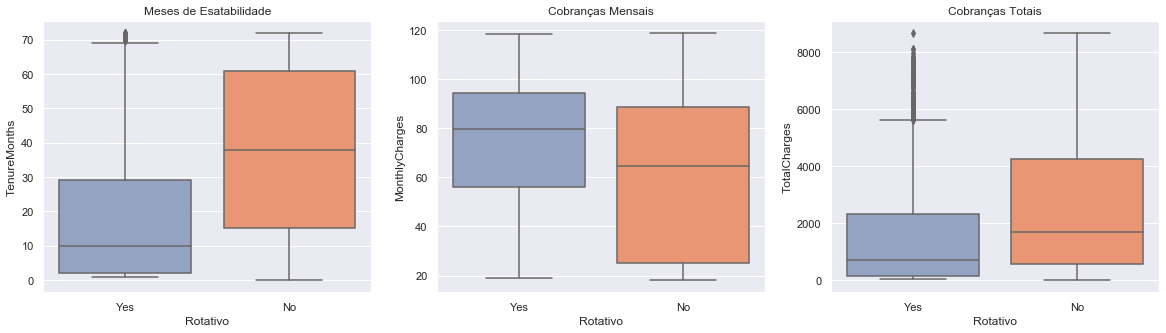

In [13]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(131)
sns.boxplot(data=data, x="ChurnLabel", y="TenureMonths", palette=["#8da0cb", "#fc8d62"])
plt.xlabel("Rotativo")
plt.title('Meses de Esatabilidade')

fig.add_subplot(132)
sns.boxplot(data=data, x="ChurnLabel", y="MonthlyCharges", palette=["#8da0cb", "#fc8d62"])
plt.xlabel("Rotativo")
plt.title('Cobranças Mensais')

fig.add_subplot(133)
sns.boxplot(data=data, x="ChurnLabel", y="TotalCharges", palette=["#8da0cb", "#fc8d62"])
plt.xlabel("Rotativo")
plt.title('Cobranças Totais')
plt.show()

Insigths:
* Para os meses de estabilidade (tenure), notamos que a mediana de clientes cancelados é de cerca de 10 meses.

* Para cobranças mensais, os clientes cancelados tiveram cobranças mensais mais altas do que os clientes retidos, com uma mediana de 80.

* Para cobranças totais, os clientes cancelados tiveram cobranças totais mais baixas do que os clientes retidos.

Com base nos insights, como os clientes tendem a ter um mandato mais curto quando suas cobranças mensais são mais altas, isso afeta suas cobranças totais. Isso é refletido pelos custos totais mais baixos para os clientes cancelados. 

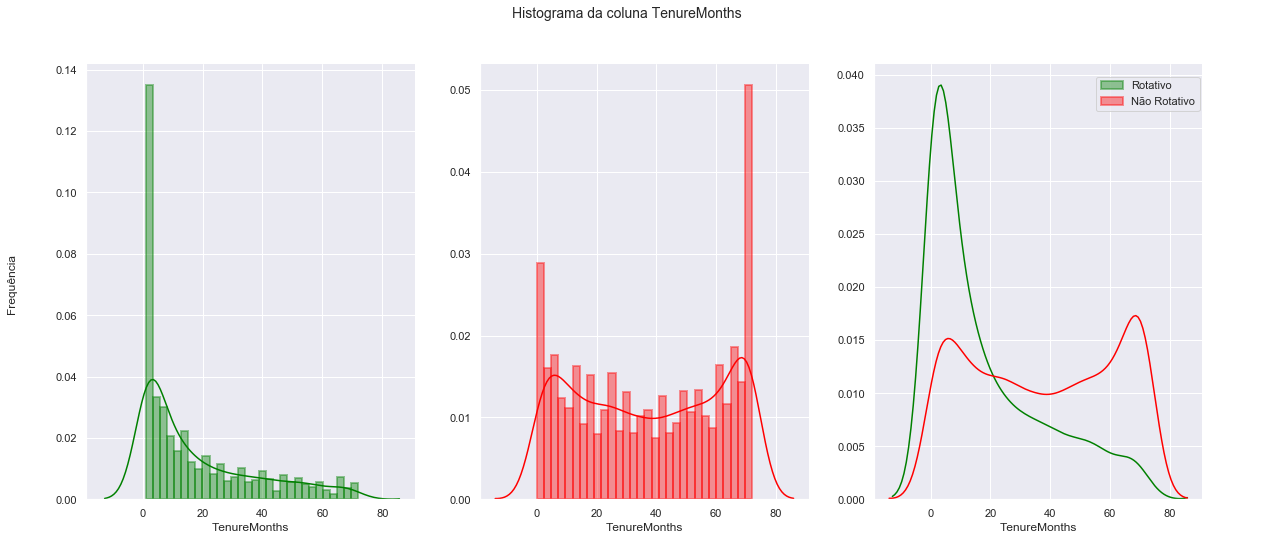

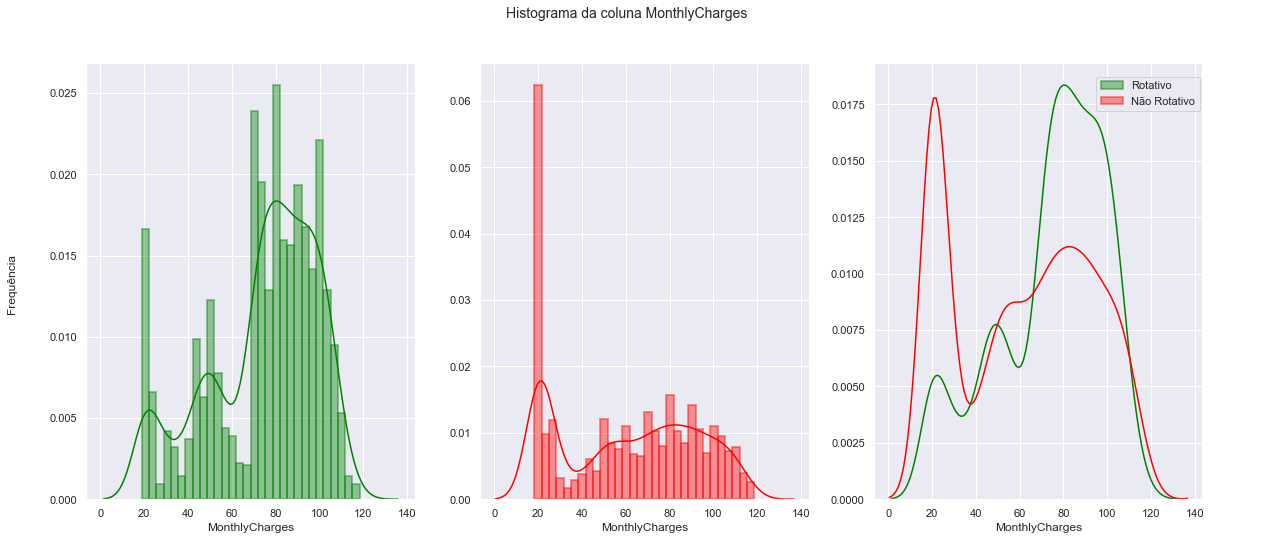

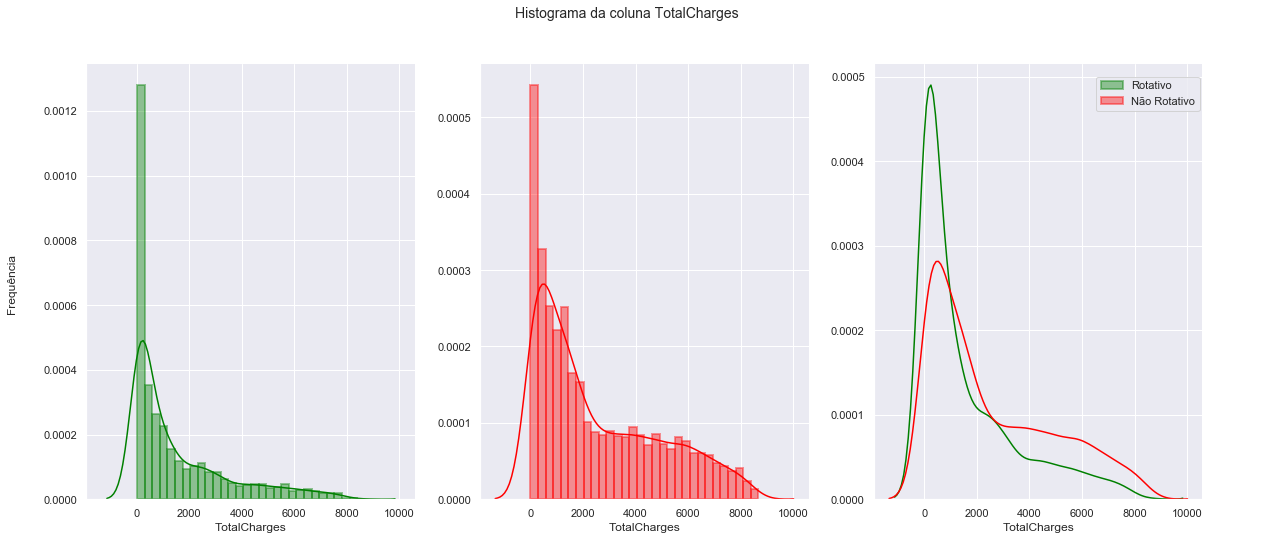

In [14]:
def plot_dist(churn, no_churn, attr):
    f, axes = plt.subplots(1, 3, figsize=(20, 8), sharex=True) 
    ax1=sns.distplot(rotativo[attr] , color="green", ax=axes[0], bins=30,
                     hist_kws=dict(edgecolor="green", linewidth=2)) 

    ax2=sns.distplot(nao_rotativo[attr] , color="red", ax=axes[1], bins=30,
                     hist_kws=dict(edgecolor="red", linewidth=2))

    ax3=sns.kdeplot(rotativo[attr] , color="green", ax=axes[2], legend=False)
    ax3=sns.kdeplot(nao_rotativo[attr] , color="red", ax=axes[2], legend=False)
    ax3.set_xlabel(attr)
    
    sns.despine(top=True, right=True)
    f.text(0.07, 0.5, 'Frequência', va='center', rotation='vertical')
    f.suptitle(f'Histograma da coluna {attr}', fontsize=14)
    f.legend(labels=['Rotativo','Não Rotativo'], loc=1, borderaxespad=7)

plot_dist(rotativo, nao_rotativo, "TenureMonths")
plot_dist(rotativo, nao_rotativo, "MonthlyCharges")
plot_dist(rotativo, nao_rotativo, "TotalCharges")

Insitghs:

* Os clientes recentes são mais propensos a abandonar

* Clientes com taxas mensais mais altas também são mais propensos a abandonar

* A estabilidade mensal e as cobranças mensais são provavelmente características importantes. 

Quando analisamos a rotatividade dos contrados vimos que os mais longos possuem menos rotativide. Porém, os contratos de um e dois anos provavelmente têm multas contratuais e, portanto, os clientes têm que esperar até o final do contrato para cancelar. Agora, vamos dar uma olhada na relação dos contratos com os recursos numéricos.

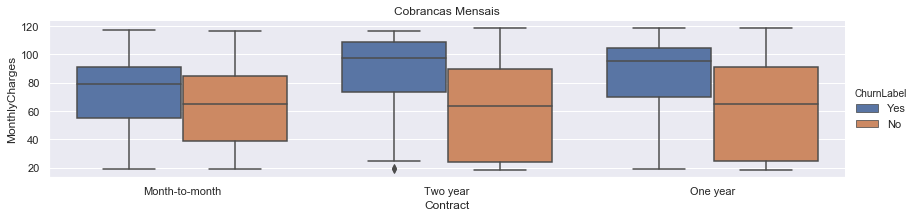

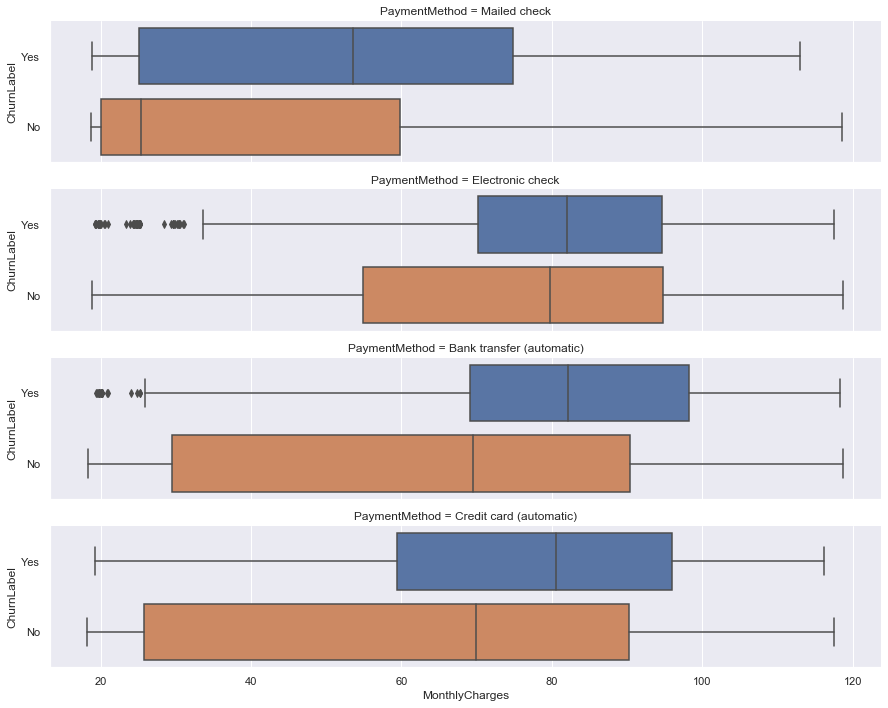

In [15]:

ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="ChurnLabel", kind="box", data=data, height=3, aspect=4)
plt.title("Cobrancas Mensais")

ax = sns.catplot(y="ChurnLabel", x="MonthlyCharges", row="PaymentMethod", kind="box", data=data, height=2.5, aspect=5, orient='h')

plt.show()

Insigths:

* Contratos mais longos são mais afetados por taxas mensais mais altas (para taxa de rotatividade).

* Mailed check têm custos mais baixos. 

* Há uma grande diferença nas cobranças entre os clientes que abandonam e os que não o fazem em relação ao mailed check.

## Rotatividade dos Clientes Baseado na Estabilidade Mensal

Com base nos gráficos que vimos até agora, há uma grande indicação de que a estabilidade mensal está fortemente correlacionada com a rotatividade, então precisamos dividi-la ainda mais.

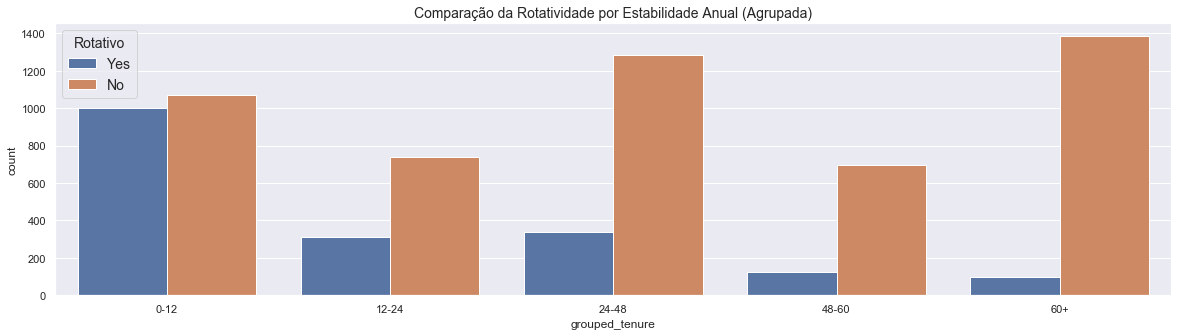

In [16]:
# quebra a variável tenrue em 12 meses(anual)
replace_tenure = [(range(0,12), '0-12'),(range(12,24), '12-24'),(range(24,48), '24-48'),(range(48,60), '48-60'),(range(60,73), '60+')]
data["grouped_tenure"] = data['TenureMonths']
for i, x in replace_tenure:
    data["grouped_tenure"].replace(i, x, inplace=True)

plt.figure(figsize=(20,5))
plt.title('Comparação da Rotatividade por Estabilidade Anual (Agrupada)', fontsize=14)
sns.countplot(data=data, x='grouped_tenure',hue='ChurnLabel', order=sorted(data['grouped_tenure'].value_counts().index))
plt.legend(fontsize=14, title_fontsize=14, title ='Rotativo')
plt.show()

* Do gráfico acima, podemos deduzir que o número de pessoas rotativas aumenta quanto menor é a estabilidade anual. 

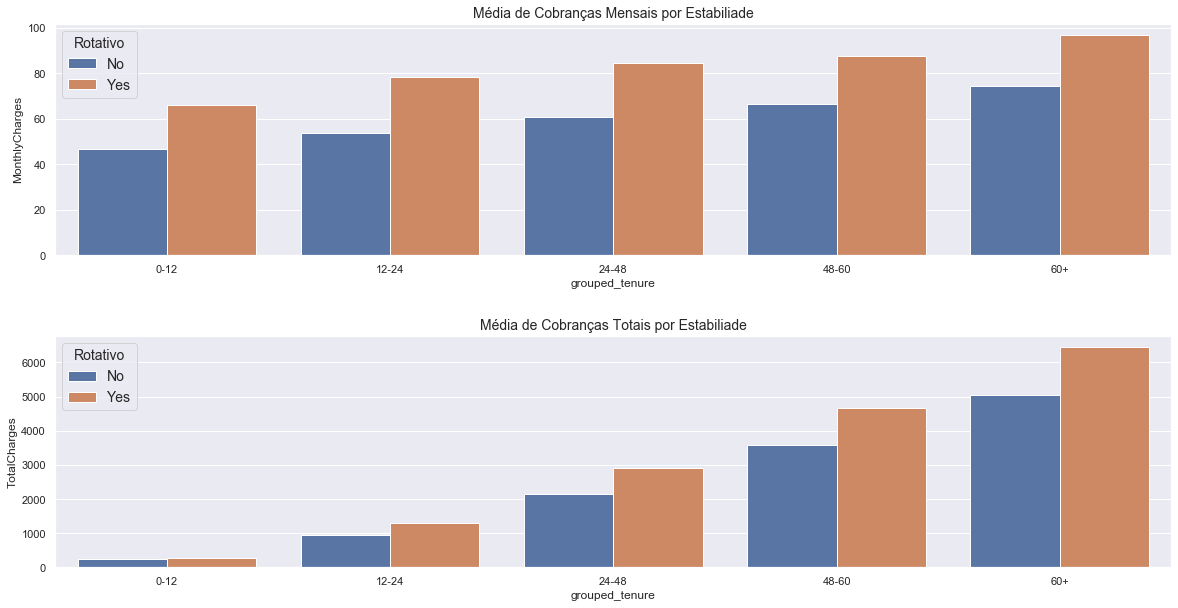

In [17]:
avg_tenure_group = data.groupby(["grouped_tenure","ChurnLabel"])[["MonthlyCharges","TotalCharges"]].mean().reset_index()

fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.35)

fig.add_subplot(211)
plt.title('Média de Cobranças Mensais por Estabiliade', fontsize=14)
sns.barplot(data=avg_tenure_group, x='grouped_tenure',y='MonthlyCharges',hue='ChurnLabel', 
            order=sorted(avg_tenure_group['grouped_tenure'].value_counts().index))
plt.legend(fontsize=14, title_fontsize=14, title ='Rotativo')

fig.add_subplot(212)
plt.title('Média de Cobranças Totais por Estabiliade', fontsize=14)
sns.barplot(data=avg_tenure_group, x='grouped_tenure',y='TotalCharges',hue='ChurnLabel', 
            order=sorted(avg_tenure_group['grouped_tenure'].value_counts().index))
plt.legend(fontsize=14, title_fontsize=14, title ='Rotativo')
plt.show()

* Dos gráficos acima, podemos deduzir que o número de pessoas rotativas aumenta quanto maior é a cobrança.

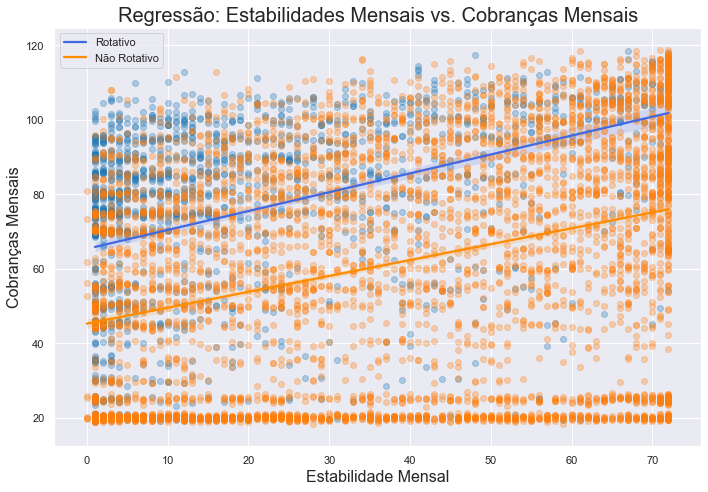

In [18]:
# gráfico de regressão das mudanças para tenure 

fig = plt.figure(figsize=(10, 7))
sns.regplot(data=rotativo, x='TenureMonths', y='MonthlyCharges', 
            scatter_kws = {'color': 'tab:blue', 'alpha' : 0.3}, 
            line_kws={'color' : 'royalblue'}) 
sns.regplot(data=nao_rotativo, x='TenureMonths', y='MonthlyCharges', 
            scatter_kws = {'color': 'tab:orange', 'alpha' : 0.3}, 
            line_kws={'color' : 'darkorange'})

# Legend, title and labels.
plt.legend(labels=['Rotativo', 'Não Rotativo'])
plt.title('Regressão: Estabilidades Mensais vs. Cobranças Mensais', size=20)
plt.xlabel('Estabilidade Mensal', size=16)
plt.ylabel('Cobranças Mensais', size=16)
plt.tight_layout()
plt.show()

Insigths:

* Existe uma relação linear positivia ente o aumento das cobranças mensais e o aumento da rotatividade de clientes.

### Mapa de Densidade Demográfica dos Clientes

In [19]:
fig = px.density_mapbox(data_frame=demographic, lat='Latitude', lon='Longitude', radius=10,
                        center=dict(lat=38, lon=-110), zoom=2.5,animation_frame='ChurnValue',
                        mapbox_style="stamen-terrain")
fig.show()

Insigth:
* Da figura acima, podemos visualizar no mapa a localização dos clientes rotativos e vemos que estão distribuídos uniformemente no estado da Califórnia, ou seja, a localização não é um fator que influencia na rotatividade.

## Razões dos Clientes que Deixaram a Empresa

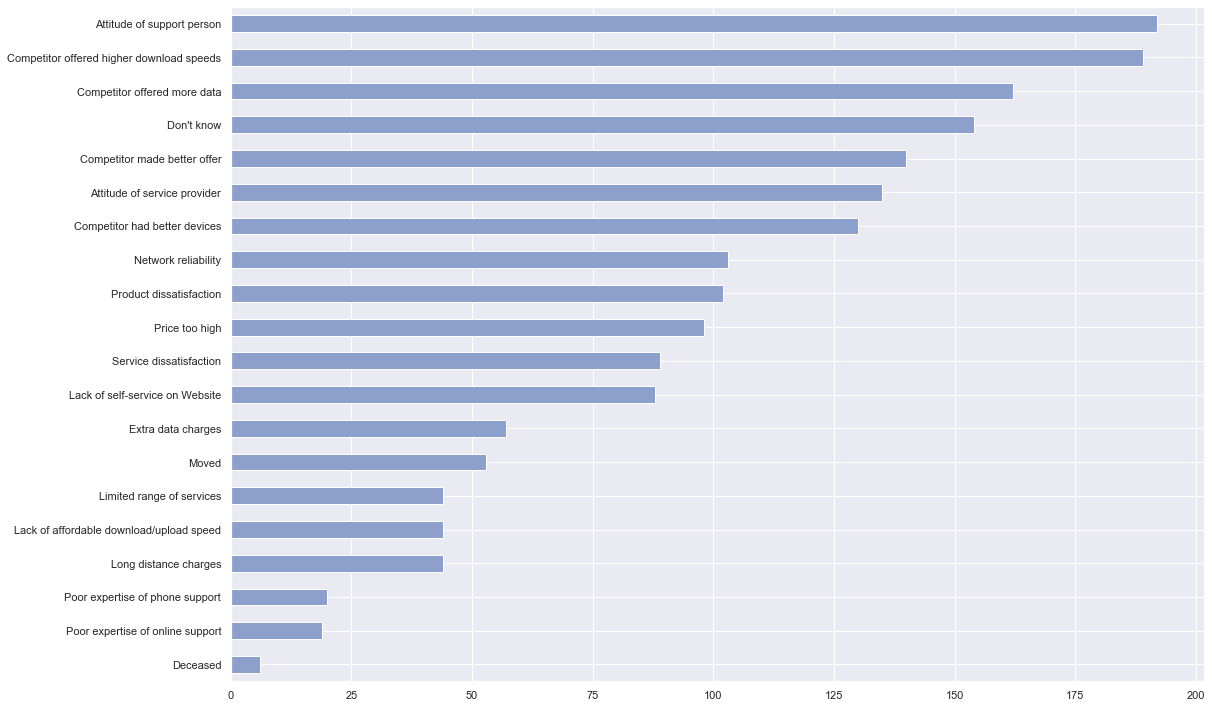

In [20]:
# lista as 20 razões fornecidas pelos clientes de abandono da empresa
plt.figure(figsize=(17,10))
demographic.ChurnReason.value_counts().sort_values(ascending=True).plot(kind='barh',color="#8da0cb")
plt.tight_layout()
plt.show()

Insigths:

* Principal motivo de um cliente deixar a empresa é devido a atitudes do pessoal do suporte técnico.

* Motivos segundários em alta estão relacionados com melhores serviços (velocidade de download, mais dados, melhores ofertas, melhores aparelhos) oferecidos pela concorrência.

* Motivos terceários estão relacionadas a insatisfação com os serviços oferecidos pela empresa.

## Engenharia de Recursos

Vamos manipular os dados para que os modelos de machine learning possam atuar corretamente.
Primeiro temos que mudar as variáveis categóricas para classificações numéricas.

In [21]:
# faz uma cópia dos dados
df = data.copy()

In [22]:
# divide em intrvalos semestrais a coluna de estabilidade mensal
df['tenure_bin'] = pd.cut(df.TenureMonths,
                          pd.IntervalIndex.from_tuples([(-1,6),(6,12),(12,18),(18,24),
                                                        (24,30),(30,36),(36,42),(42,48),
                                                        (48,54),(54,60),(60,66),(66,72)]))

# converte variáveis categóricas em indicadores de variáveis
df = pd.concat([df, pd.get_dummies(df.tenure_bin, prefix='tenure_bin')], axis=1)
df = pd.concat([df, pd.get_dummies(df.Contract, prefix='Contract')], axis=1)
df = pd.concat([df, pd.get_dummies(df.PaymentMethod, prefix='PaymentMethod')], axis=1)
df = pd.concat([df, pd.get_dummies(df.InternetService, prefix='InternetService')], axis=1)
df.drop(['TenureMonths','tenure_bin','Contract','PaymentMethod','InternetService'],axis = 1 ,inplace = True)

# Codifique rótulos das variáveis com valor entre 0 e número de classes
encodeur = LabelEncoder()
for col in df.columns:
     if col in ['City','ChurnLabel','Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','MultipleLines','OnlineSecurity',
                'OnlineBackup','DeviceProtection' , 'TechSupport', 'StreamingTV', 'StreamingMovies', 'StreamingTV']:
        df[col] = encodeur.fit_transform(df[col])

In [23]:
# exibe o novo dataframe
df.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,1,1,2,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,1,1,1,2,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4,1,0,0,1,1,2,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0


### Correlação entre as Variáveis

Vamos como as variáveis se correlacionam com a rotatividade

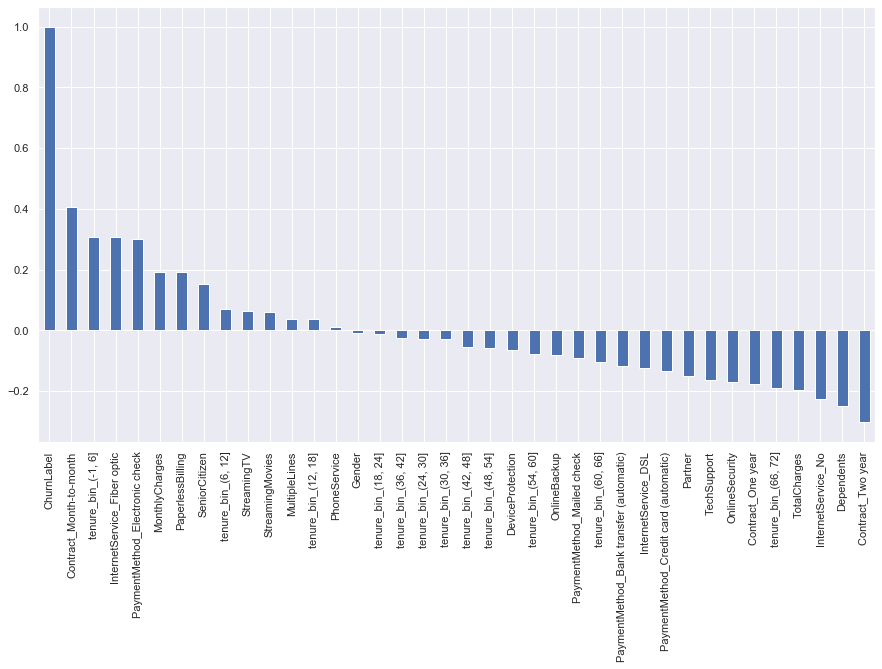

In [24]:
plt.figure(figsize=(15,8))
df.corr()['ChurnLabel'].sort_values(ascending = False).plot(kind='bar')
plt.show()

* Gênero não tem influência na rotatividade, portanto não usaremos essa variável nos modelos de predição.

In [25]:
# eleta a coluna gender 
df = df.drop('Gender',axis=1)

# retira caracteres do nome das colunas
df.columns = df.columns.str.replace("-", "_")\
            .str.replace("[","(").str.replace("]",")")

In [26]:
# separa os dados em X(variáveis independentes) e y (variável dependente)
X = df.drop(columns=['ChurnLabel','grouped_tenure'])
y = df['ChurnLabel']
seed = 30

# separa os dados em conjunto de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

## Modelo de Predição usando XGBoost

O XGBoost é um algoritmo de aprendizado de máquina baseado em árvore de decisão que usa uma estrutura de aumento de gradiente. 

Vamos criar uma função que reproduz as métricas de avaliação do nosso modelo e classificação.

In [72]:
# Função para avaliar os modelos
def print_report(model,X_test, y_test, name):
    print('==='*20)
    print('\n> ',name)
    
    # Calcula o valor previsto
    pred =  model.predict(X_test)
    # Calcula a acurácia da previsão
    scr = model.score(X_test, y_test)
    print('>  Accuracy: {}'.format(scr.round(2)))
    
    # Calcula a matriz de confusão
    corr_pred = confusion_matrix(y_test, pred)
    plt.rcParams["figure.figsize"] = (8,6)
    sns.heatmap(corr_pred,annot=True, fmt="d",cmap="Purples")
    plt.xlabel("Rotatividade Prevista do Modelo")
    plt.ylabel("Rotatividade Real")
    plt.show()
    
    # Exibe as métricas de precision, recall e f1
    print(classification_report(y_test, pred))

    # Desenha a curva roc
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, pred)
    plot_roc_curve(model, X_test, y_test)
    plt.show()
    
    # Calcula a área da curva roc
    roc_acc = roc_auc_score(y_test, pred);
    print('> ROC Accuracy: {}'.format(roc_acc.round(4)));
    
    return pred

Temos que escolher os parâmetros que irão otimmizar nosso modelo. 

In [27]:
# lista de parâmetros a serem escolhidos
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'n_estimators': [50, 100, 150],
    'scale_pos_weight': [1, 1.5, 2],
    'max_delta_step': [1, 2, 3]
}

# modelo
clf = XGBClassifier(objective = 'binary:logistic')

Usamos dois métodos para rearranjar os dados e escolher os melhores parâmetros
:
* StratifiedKFold: Fornece índices de treinamento/teste para dividir dados em conjuntos de treinamento/teste. Cada conjunto contém aproximadamente a mesma porcentagem de amostras de cada classe de destino que o conjunto completo. 

* RandomizedSearchCV: implementa uma pesquisa aleatória sobre parâmetros, onde cada configuração é amostrada a partir de uma distribuição sobre possíveis valores de parâmetro. Adicionar parâmetros que não influenciam o desempenho não diminui a eficiência. 

In [30]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=50,
                            n_jobs=4, verbose=2, cv=skf,                            
                            scoring= 'f1_macro', refit=True, random_state=seed)

# treina o moelo e escolhe os parametros com melhor métrica 
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[20:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:04:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None,...
                                        'colsample_bytree': [0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate'

In [31]:
# exibe a melhor pontuação obtida
best_score = rs_clf.best_score_
# exibe os melhores parametros escolhidos
best_params = rs_clf.best_params_

print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.7547430343396455
Best params: 
colsample_bylevel: 1.0
colsample_bytree: 0.7
gamma: 0.25
learning_rate: 0.1
max_delta_step: 2
max_depth: 4
min_child_weight: 1.0
n_estimators: 150
reg_lambda: 50.0
scale_pos_weight: 1.5
silent: False
subsample: 0.8


Após feita o processo seletivo dos parametros, podemos finalmente treinar o modelo final.

In [32]:
best_xgb = XGBClassifier(objective = 'binary:logistic',
                         colsample_bylevel = 0.7,
                         colsample_bytree = 0.8,
                         gamma = 1,
                         learning_rate = 0.15,
                         max_delta_step = 3,
                         max_depth = 4,
                         min_child_weight = 1,
                         n_estimators = 50,
                         reg_lambda = 10,
                         scale_pos_weight = 1.5,
                         subsample = 0.9,
                         silent = False,
                         n_jobs = 4
                        )

best_xgb.fit(X_train, y_train)

[20:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=3, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1.5, silent=False,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

## Analisando os Resultados do Modelo

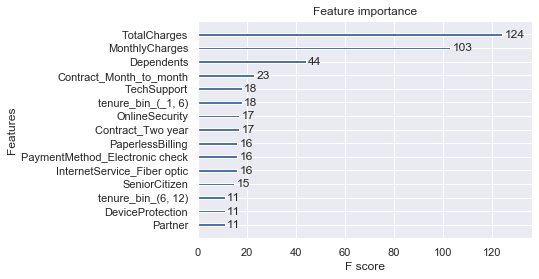

In [38]:
# visualiza as variáveis que mais influênciam na previsão
xgb.plot_importance(best_xgb, max_num_features = 15)
plt.show()

Insigths:

* Cobrancas (mensais e total), se o cliente possui dependentes e contratos e prazo curto(mês-a-mês) são as variáveis que mais influenciam na rotatividade.

Agora vamos ver se nosso modelo é eficaz na predição da rodatividade.


>  XGBoost Classifier
>  Accuracy: 0.8


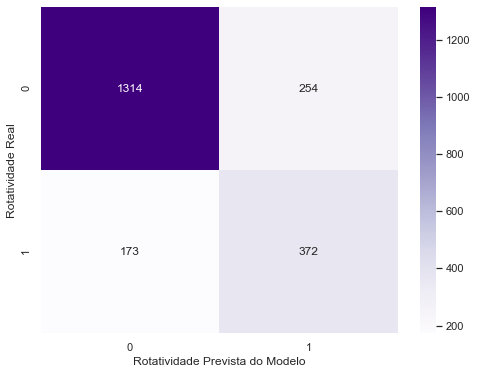

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1568
           1       0.59      0.68      0.64       545

    accuracy                           0.80      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.81      0.80      0.80      2113



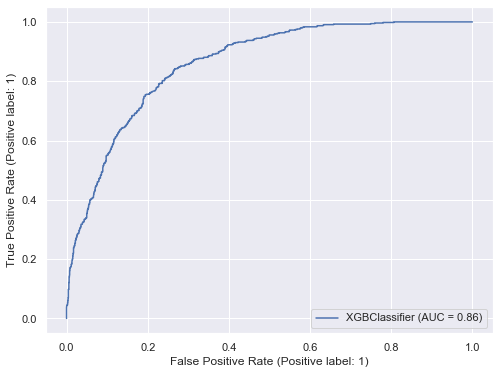

> ROC Accuracy: 0.7603


In [73]:
# faz a predição da rotatividade e avalia os resultados
xgb_pred = print_report(best_xgb, X_test, y_test, "XGBoost Classifier")

* Conseguimos uma acuráia de 80% em nosso modelo em prever uma classe (rotativo ou não).

* A matriz de confusão formece a quantidade de clientes classificados como não rotativos (0) e rotativos (1) na diagonal da matriz. Os valores nas laterais são chamados de falso positivo (foi classificado como rotativo mas não era) e falso negativo (classificado como não rotativo e era).

Normalmente no ambiente de negócios, usa-se a pontuação de previsão (probabilidade), em vez da previsão de classe. Essa pontuação é usada para associar aos perfis de assinante e pode ser usada para ajustar a segmentação da campanha. 

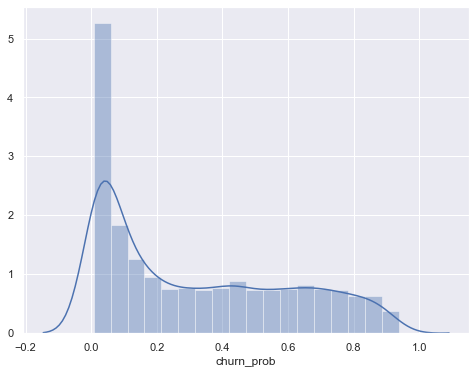

In [49]:
# calcula as probabilidade de previsão de rotatividade
y_all_prob = best_xgb.predict_proba(X)
df['churn_prob'] = y_all_prob[:, 1]
sns.distplot(df['churn_prob'])
plt.show()

* O gráfico acima mostra que nosso modelo prevê uma quantidade baixa de rotatividad entre todos os clientes da empresa.

## Resultado Final

Chegamos no final do projeto, e agora podemos criar uma tabela com as pontuações de previsão (probabilidade) de cada cliente sair da empresa (rotatividade).

In [75]:
Resultado = pd.DataFrame()
Resultado['CllenteID'] = telco['CustomerID']
Resultado['Rotativo'] = df['ChurnLabel']
Resultado['Probabilidade_Rotativo'] = df['churn_prob']

Resultado

,CllenteID,Rotativo,Probabilidade_Rotativo
0,3668-QPYBK,1,0.568718
1,9237-HQITU,1,0.514533
2,9305-CDSKC,1,0.624950
3,7892-POOKP,1,0.206687
4,0280-XJGEX,1,0.186655
...,...,...,...
7038,2569-WGERO,0,0.020984
7039,6840-RESVB,0,0.019432
7040,2234-XADUH,0,0.029419
7041,4801-JZAZL,0,0.189651


Por fim, podemos estipulas a alocação de custos usando os valores e falso positivo e falso negativo obtidos da matriz de confusão.

In [71]:
print("Clientes não classificados como rotativos mas deixaram a impresa: ", round(173/(1314+173)*100,2),"%")
print("Clientes classificados como rotativos mas ainda estão na impresa: ", round(254/(372+253)*100,2),"%")

Clientes não classificados como rotativos mas deixaram a impresa:  11.63 %
Clientes classificados como rotativos mas ainda estão na impresa:  40.64 %


## Conclusão

1. O rpefil dos clientes rotativos pode ser descrito como: geralmente idoso, que não tem parceiro nem dependentes, com múltiplas linhas, com internete e fibra ótica, sem serviços de segurança, que pagam com cheque eletrônico, com contratos de curto prazo e altas cobranças mensais.


2. Criamos uma tabela chamada Resultados com a probailidade de cada cliente em sair da empresa.

3. Podemos fazer uma alocação de custos:
    * Com base na explicação inicial, o custo de aquisição de novos clientes é 5x o custo de retenção de clientes. Então, suponha que temos um orçamento para manter clientes de R$ 50. Então, automaticamente, temos um orçamento para conseguir um novo cliente de R$250.  Usando o modelo estudado, precisaríamos de R$250x12% = R$3.000 para adquirir novos clientes. Enquanto isso, o custo de retenção de clientes seria de R$50x41% = R$2.050.
